# Machine Learning Models (TFIDF)

In [1]:
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import calibration_curve
from scipy.sparse import coo_matrix, hstack

%matplotlib inline

In [2]:
url = 'http://bit.ly/mc_clean_data_usc'
df = pd.read_csv(url)

df.head()

,rude,trim_text,review_len,sentiment_polarity,sentiment_objectivity
0,1,im not a huge mcds lover but ive been to bette...,50,-0.328571,0.828571
1,1,terrible customer service came in at pm and st...,80,-0.257143,0.521429
2,0,first they lost my order actually they gave it...,156,0.093750,0.529167
3,0,i see im not the only one giving star only bec...,22,0.000000,1.000000
4,1,well its mcdonalds so you know what the food i...,143,-0.009361,0.437175


In [3]:
min_df = 0.01
max_df = 0.95
vect = TfidfVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(1, 2))


X = df['trim_text']
y = df['rude']

X_dtm = vect.fit_transform(X)

In [4]:
"""
type(X_dtm_1)
review_len = np.array(df['review_len']).astype(float)
sentiment_polarity = np.array(df['sentiment_polarity']).astype(float)
sentiment_objectivity = np.array(df['sentiment_objectivity']).astype(float)

X_dtm_2 = hstack((X_dtm_1, review_len[:,None])).tocsr() 
X_dtm_3 = hstack((X_dtm_2, sentiment_polarity[:,None])).tocsr() 
X_dtm = hstack((X_dtm_3, sentiment_objectivity[:,None])).tocsr() 
"""

"\ntype(X_dtm_1)\nreview_len = np.array(df['review_len']).astype(float)\nsentiment_polarity = np.array(df['sentiment_polarity']).astype(float)\nsentiment_objectivity = np.array(df['sentiment_objectivity']).astype(float)\n\nX_dtm_2 = hstack((X_dtm_1, review_len[:,None])).tocsr() \nX_dtm_3 = hstack((X_dtm_2, sentiment_polarity[:,None])).tocsr() \nX_dtm = hstack((X_dtm_3, sentiment_objectivity[:,None])).tocsr() \n"

In [5]:
X_dtm.shape

(1525, 758)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.30, random_state=42)

## Naive_Bayes (`MultinomialNB`)

In [7]:
nb = MultinomialNB()

# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'alpha': [0, 1],
              'fit_prior': ['True','False']}

grid = GridSearchCV(nb, param_grid, verbose=3, cv=10)

In [8]:
 # Fit the model using the grid search estimator. 
# This will take the Naive Bayes model and try each combination of parameters
grid.fit(X_train, y_train)

 # List the best score
print(grid.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] alpha=0, fit_prior=True .........................................
[CV]  alpha=0, fit_prior=True, score=0.7870370370370371, total=   0.0s
[CV] alpha=0, fit_prior=True .........................................
[CV]  alpha=0, fit_prior=True, score=0.7592592592592593, total=   0.0s
[CV] alpha=0, fit_prior=True .........................................
[CV]  alpha=0, fit_prior=True, score=0.7777777777777778, total=   0.0s
[CV] alpha=0, fit_prior=True .........................................
[CV]  alpha=0, fit_prior=True, score=0.7102803738317757, total=   0.0s
[CV] alpha=0, fit_prior=True .........................................
[CV]  alpha=0, fit_prior=True, score=0.7358490566037735, total=   0.0s
[CV] alpha=0, fit_prior=True .........................................
[CV]  alpha=0, fit_prior=True, score=0.7264150943396226, total=   0.0s
[CV] alpha=0, fit_prior=True .........................................
[CV]  alpha=0, f

/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/gta/anaconda3/lib/python3.6/site-


[CV] alpha=0, fit_prior=False ........................................
[CV]  alpha=0, fit_prior=False, score=0.7358490566037735, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV] .............. alpha=1, fit_prior=True, score=0.75, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7685185185185185, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7777777777777778, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7289719626168224, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7547169811320755, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7264150943396226, total=   0.0s
[CV]

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
/Users/gta/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [9]:
# List the best parameters for this dataset
print(grid.best_params_)

{'alpha': 0, 'fit_prior': 'True'}


In [10]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test)

print(classification_report(y_test, predictions,
                            target_names=["not rude", "rude"]))

             precision    recall  f1-score   support

   not rude       0.79      0.96      0.86       308
       rude       0.84      0.47      0.60       150

avg / total       0.81      0.80      0.78       458



In [11]:
nb = MultinomialNB(alpha=1.0e-10, fit_prior=True)
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
confusion_matrix(y_test, y_pred_class)

array([[295,  13],
       [ 80,  70]])

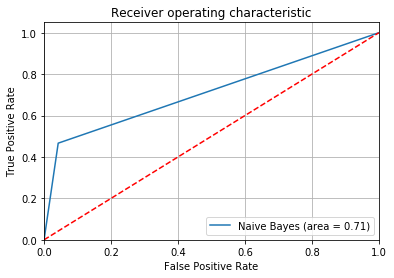

In [12]:
nb_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

plt.figure()
plt.grid()

plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")
plt.show()

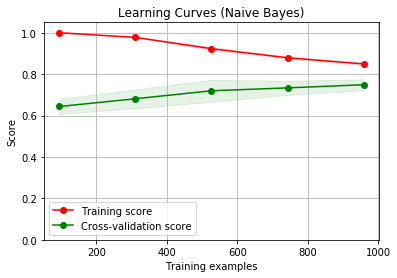

In [13]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=10)

plt.title("Learning Curves (Naive Bayes)")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="g", 
         label="Cross-validation score")

plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.show()

## Naive_Bayes (`GaussianNB`)

In [14]:
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred_class = nb.predict(X_test.toarray())
confusion_matrix(y_test, y_pred_class)

array([[295,  13],
       [ 80,  70]])

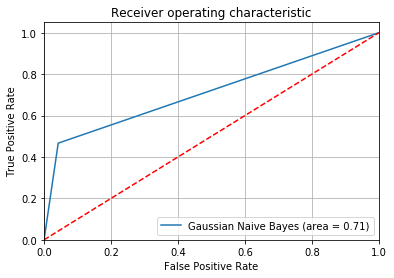

In [15]:
gnb_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

plt.figure()
plt.grid()

plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")
plt.show()

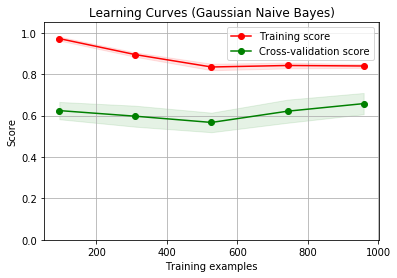

In [16]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(gnb, X_train.toarray(), y_train, cv=10)

plt.title("Learning Curves (Gaussian Naive Bayes)")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="g", 
         label="Cross-validation score")

plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.show()

## Logistic Regression

In [17]:
lg = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

grid = GridSearchCV(lg, hyperparameters, verbose=3, cv=10)

In [18]:
 # Fit the model using the grid search estimator. 
# This will take the logistic regression  model and try each combination of parameters

grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7592592592592593, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7685185185185185, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] .................... C=1.0, penalty=l1, score=0.75, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7383177570093458, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.8113207547169812, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7735849056603774, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=2.78255940221, penalty=l1, score=0.7407407407407407, total=   0.0s
[CV] C=2.78255940221, penalty=l1 .....................................
[CV]  C=2.78255940221, penalty=l1, score=0.7870370370370371, total=   0.0s
[CV] C=2.78255940221, penalty=l1 .....................................
[CV]  C=2.78255940221, penalty=l1, score=0.7777777777777778, total=   0.0s
[CV] C=2.78255940221, penalty=l1 .....................................
[CV]  C=2.78255940221, penalty=l1, score=0.7663551401869159, total=   0.0s
[CV] C=2.78255940221, penalty=l1 .....................................
[CV]  C=2.78255940221, penalty=l1, score=0.8490566037735849, total=   0.0s
[CV] C=2.78255940221, penalty=l1 .....................................
[CV]  C=2.78255940221, penalty=l1, score=0.7641509433962265, total=   0.0s
[CV] C=2.78255940221, penalty=l1 .....................................
[CV]  C=2.78255940221, penalty=l1, score=0.8113207547169812, total=   0.0s
[CV] C=2.78255940221, penalty=l1 ................

[CV]  C=59.9484250319, penalty=l1, score=0.7037037037037037, total=   0.0s
[CV] C=59.9484250319, penalty=l1 .....................................
[CV]  C=59.9484250319, penalty=l1, score=0.719626168224299, total=   0.0s
[CV] C=59.9484250319, penalty=l1 .....................................
[CV]  C=59.9484250319, penalty=l1, score=0.7358490566037735, total=   0.0s
[CV] C=59.9484250319, penalty=l1 .....................................
[CV]  C=59.9484250319, penalty=l1, score=0.6981132075471698, total=   0.1s
[CV] C=59.9484250319, penalty=l1 .....................................
[CV]  C=59.9484250319, penalty=l1, score=0.7358490566037735, total=   0.1s
[CV] C=59.9484250319, penalty=l1 .....................................
[CV]  C=59.9484250319, penalty=l1, score=0.7830188679245284, total=   0.0s
[CV] C=59.9484250319, penalty=l1 .....................................
[CV]  C=59.9484250319, penalty=l1, score=0.6886792452830188, total=   0.0s
[CV] C=59.9484250319, penalty=l1 .................

[CV]  C=1291.54966501, penalty=l1, score=0.7009345794392523, total=   0.0s
[CV] C=1291.54966501, penalty=l1 .....................................
[CV]  C=1291.54966501, penalty=l1, score=0.7547169811320755, total=   0.0s
[CV] C=1291.54966501, penalty=l1 .....................................
[CV]  C=1291.54966501, penalty=l1, score=0.7075471698113207, total=   0.0s
[CV] C=1291.54966501, penalty=l1 .....................................
[CV]  C=1291.54966501, penalty=l1, score=0.7264150943396226, total=   0.0s
[CV] C=1291.54966501, penalty=l1 .....................................
[CV]  C=1291.54966501, penalty=l1, score=0.7735849056603774, total=   0.0s
[CV] C=1291.54966501, penalty=l1 .....................................
[CV]  C=1291.54966501, penalty=l1, score=0.6792452830188679, total=   0.0s
[CV] C=1291.54966501, penalty=l1 .....................................
[CV]  C=1291.54966501, penalty=l1, score=0.6698113207547169, total=   0.0s
[CV] C=1291.54966501, penalty=l2 ................

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.1s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e+00,   2.78256e+00,   7.74264e+00,   2.15443e+01,
         5.99484e+01,   1.66810e+02,   4.64159e+02,   1.29155e+03,
         3.59381e+03,   1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [19]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 2.7825594022071245, 'penalty': 'l1'}


In [20]:
# List the best score
print(grid.best_score_)

0.777881911903


In [21]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test)

 # Calculate classification report
print(classification_report(y_test, predictions,
                            target_names=["not rude", "rude"]))

             precision    recall  f1-score   support

   not rude       0.80      0.88      0.84       308
       rude       0.69      0.56      0.62       150

avg / total       0.77      0.78      0.77       458



In [22]:
lg = LogisticRegression(penalty='l1', C=2.7825594022071245)

lg.fit(X_train, y_train)
y_pred_class = lg.predict(X_test)
confusion_matrix(y_test, y_pred_class)

array([[271,  37],
       [ 66,  84]])

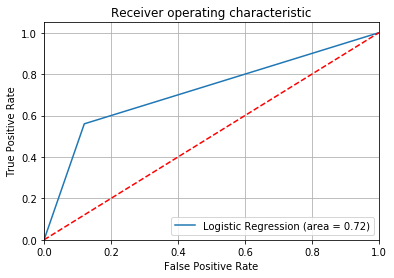

In [23]:
lg_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

plt.figure()
plt.grid()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")
plt.show()

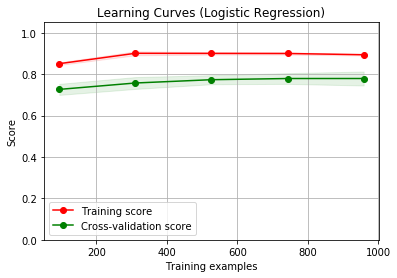

In [24]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(lg, X_train, y_train, cv=10)

plt.title("Learning Curves (Logistic Regression)")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="g", 
         label="Cross-validation score")

plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.show()

## KNN Model

In [25]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

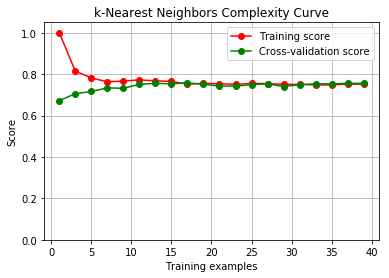

In [26]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes = [num for num in range(1, 40, 2)]

plt.title("k-Nearest Neighbors Complexity Curve")

plt.grid()

plt.plot(train_sizes, 
         train_scores, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores, 
         'o-', color="g", 
         label="Cross-validation score")

plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [28]:
 # Make predictions with the hypertuned model
y_pred_class = knn.predict(X_test)

 # Calculate classification report
print(classification_report(y_test, y_pred_class,
                            target_names=["not rude", "rude"]))

             precision    recall  f1-score   support

   not rude       0.75      0.95      0.84       308
       rude       0.77      0.34      0.47       150

avg / total       0.76      0.75      0.72       458



In [29]:
confusion_matrix(y_test, y_pred_class)

array([[293,  15],
       [ 99,  51]])

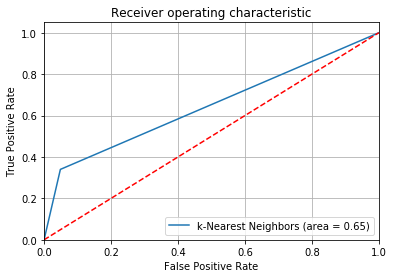

In [30]:
knn_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

plt.figure()
plt.grid()

plt.plot(fpr, tpr, label='k-Nearest Neighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")
plt.show()

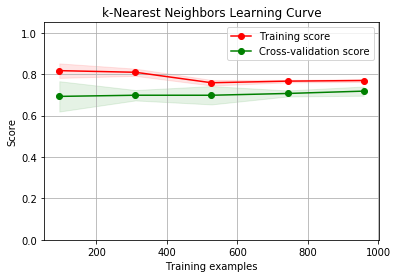

In [31]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=10)

plt.title("k-Nearest Neighbors Learning Curve")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="g", 
         label="Cross-validation score")

plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.show()

## SVC Model

In [32]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC()

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],
              'kernel': ['linear', 'poly', 'rbf']}
grid = GridSearchCV(model, param_grid, verbose=3, cv=10)

In [33]:
 # Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7685185185185185, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7870370370370371, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ..... C=1, gamma=0.0001, kernel=linear, score=0.75, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7663551401869159, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7830188679245284, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7169811320754716, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7924528301886793, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7830188679245284, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7735849056603774, total=   0.1s
[CV] C=1, gamma=0.0001,

[CV]  C=1, gamma=0.0005, kernel=rbf, score=0.6698113207547169, total=   0.1s
[CV] C=1, gamma=0.0005, kernel=rbf ...................................
[CV]  C=1, gamma=0.0005, kernel=rbf, score=0.6698113207547169, total=   0.1s
[CV] C=1, gamma=0.0005, kernel=rbf ...................................
[CV]  C=1, gamma=0.0005, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.7685185185185185, total=   0.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.7870370370370371, total=   0.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ...... C=1, gamma=0.001, kernel=linear, score=0.75, total=   0.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.7663551401869159, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linea

[CV]  C=1, gamma=0.005, kernel=rbf, score=0.6728971962616822, total=   0.2s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV]  C=1, gamma=0.005, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV]  C=1, gamma=0.005, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV]  C=1, gamma=0.005, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV]  C=1, gamma=0.005, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV]  C=1, gamma=0.005, kernel=rbf, score=0.6698113207547169, total=   0.4s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV]  C=1, gamma=0.005, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.0001, kernel=linear ....

[CV]  C=5, gamma=0.0005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.0005, kernel=poly ..................................
[CV]  C=5, gamma=0.0005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.0005, kernel=rbf ...................................
[CV]  C=5, gamma=0.0005, kernel=rbf, score=0.6666666666666666, total=   0.2s
[CV] C=5, gamma=0.0005, kernel=rbf ...................................
[CV]  C=5, gamma=0.0005, kernel=rbf, score=0.6666666666666666, total=   0.2s
[CV] C=5, gamma=0.0005, kernel=rbf ...................................
[CV]  C=5, gamma=0.0005, kernel=rbf, score=0.6666666666666666, total=   0.2s
[CV] C=5, gamma=0.0005, kernel=rbf ...................................
[CV]  C=5, gamma=0.0005, kernel=rbf, score=0.6728971962616822, total=   0.2s
[CV] C=5, gamma=0.0005, kernel=rbf ...................................
[CV]  C=5, gamma=0.0005, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.0005, kernel=rb

[CV]  C=5, gamma=0.005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.005, kernel=poly ...................................
[CV]  C=5, gamma=0.005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.005, kernel=poly ...................................
[CV]  C=5, gamma=0.005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.005, kernel=poly ...................................
[CV]  C=5, gamma=0.005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.005, kernel=poly ...................................
[CV]  C=5, gamma=0.005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.005, kernel=poly ...................................
[CV]  C=5, gamma=0.005, kernel=poly, score=0.6698113207547169, total=   0.2s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV]  C=5, gamma=0.005, kernel=rbf, score=0.6666666666666666, total=   0.2s
[CV] C=5, gamma=0.005, kernel=rbf ..

[CV]  C=10, gamma=0.0005, kernel=linear, score=0.660377358490566, total=   0.1s
[CV] C=10, gamma=0.0005, kernel=poly .................................
[CV]  C=10, gamma=0.0005, kernel=poly, score=0.6666666666666666, total=   0.1s
[CV] C=10, gamma=0.0005, kernel=poly .................................
[CV]  C=10, gamma=0.0005, kernel=poly, score=0.6666666666666666, total=   0.1s
[CV] C=10, gamma=0.0005, kernel=poly .................................
[CV]  C=10, gamma=0.0005, kernel=poly, score=0.6666666666666666, total=   0.1s
[CV] C=10, gamma=0.0005, kernel=poly .................................
[CV]  C=10, gamma=0.0005, kernel=poly, score=0.6728971962616822, total=   0.1s
[CV] C=10, gamma=0.0005, kernel=poly .................................
[CV]  C=10, gamma=0.0005, kernel=poly, score=0.6698113207547169, total=   0.1s
[CV] C=10, gamma=0.0005, kernel=poly .................................
[CV]  C=10, gamma=0.0005, kernel=poly, score=0.6698113207547169, total=   0.1s
[CV] C=10, gamma=0.0

[CV]  C=10, gamma=0.005, kernel=linear, score=0.6698113207547169, total=   0.2s
[CV] C=10, gamma=0.005, kernel=linear ................................
[CV]  C=10, gamma=0.005, kernel=linear, score=0.6981132075471698, total=   0.2s
[CV] C=10, gamma=0.005, kernel=linear ................................
[CV]  C=10, gamma=0.005, kernel=linear, score=0.7169811320754716, total=   0.1s
[CV] C=10, gamma=0.005, kernel=linear ................................
[CV]  C=10, gamma=0.005, kernel=linear, score=0.7169811320754716, total=   0.1s
[CV] C=10, gamma=0.005, kernel=linear ................................
[CV]  C=10, gamma=0.005, kernel=linear, score=0.7358490566037735, total=   0.2s
[CV] C=10, gamma=0.005, kernel=linear ................................
[CV]  C=10, gamma=0.005, kernel=linear, score=0.660377358490566, total=   0.2s
[CV] C=10, gamma=0.005, kernel=poly ..................................
[CV]  C=10, gamma=0.005, kernel=poly, score=0.6666666666666666, total=   0.1s
[CV] C=10, gamma=

[CV]  C=50, gamma=0.0001, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=50, gamma=0.0005, kernel=linear ...............................
[CV]  C=50, gamma=0.0005, kernel=linear, score=0.7129629629629629, total=   0.2s
[CV] C=50, gamma=0.0005, kernel=linear ...............................
[CV]  C=50, gamma=0.0005, kernel=linear, score=0.7407407407407407, total=   0.2s
[CV] C=50, gamma=0.0005, kernel=linear ...............................
[CV]  C=50, gamma=0.0005, kernel=linear, score=0.6759259259259259, total=   0.2s
[CV] C=50, gamma=0.0005, kernel=linear ...............................
[CV]  C=50, gamma=0.0005, kernel=linear, score=0.7289719626168224, total=   0.2s
[CV] C=50, gamma=0.0005, kernel=linear ...............................
[CV]  C=50, gamma=0.0005, kernel=linear, score=0.6698113207547169, total=   0.2s
[CV] C=50, gamma=0.0005, kernel=linear ...............................
[CV]  C=50, gamma=0.0005, kernel=linear, score=0.6886792452830188, total=   0.2s
[CV] C=50,

[CV]  C=50, gamma=0.001, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=0.6698113207547169, total=   0.2s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=0.6886792452830188, total=   0.2s
[CV] C=50, gamma=0.005, kernel=linear ................................
[CV]  C=50, gamma=0.005, kernel=linear, score=0.7129629629629629, total=   0.2s
[CV] C=50, gamma=0.005, kernel=l

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005], 'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [34]:
 # List the best score
print(grid.best_score_)

0.767572633552


In [35]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}


In [36]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test)

 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["not rude", "rude"]))

             precision    recall  f1-score   support

   not rude       0.78      0.95      0.86       308
       rude       0.82      0.44      0.57       150

avg / total       0.79      0.79      0.76       458



In [37]:
model = SVC(kernel='rbf', C=50, gamma=0.001)

In [38]:
model.fit(X_train, y_train)

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_pred_class = model.predict(X_test)
confusion_matrix(y_test, y_pred_class)

array([[308,   0],
       [148,   2]])

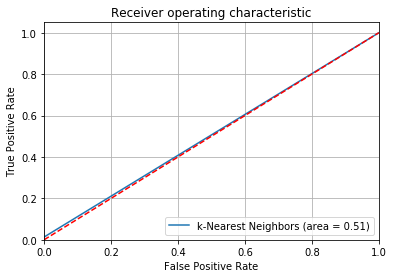

In [40]:
svm_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)

plt.figure()
plt.grid()

plt.plot(fpr, tpr, label='k-Nearest Neighbors (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")
plt.show()

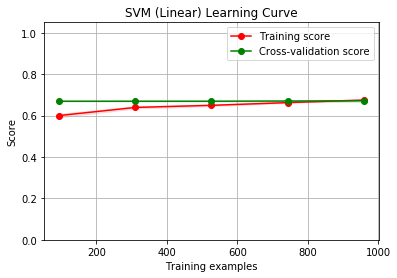

In [41]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.title("SVM (Linear) Learning Curve")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

plt.plot(train_sizes, 
         train_scores_mean, 
         'o-', 
         color="r", 
         label="Training score")

plt.plot(train_sizes, 
         test_scores_mean, 
         'o-', color="g", 
         label="Cross-validation score")

plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.show()

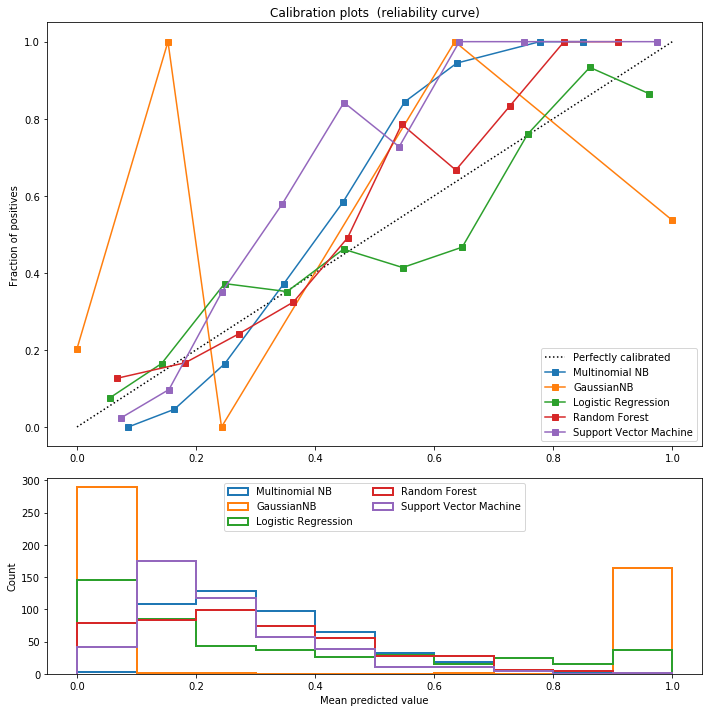

In [42]:
nb = MultinomialNB()
gnb = GaussianNB()
lg = LogisticRegression(penalty='l1', C=2.7825594022071245)
knn = KNeighborsClassifier(n_neighbors=11)
model = SVC(kernel='rbf', C=50, gamma=0.001)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(nb, 'Multinomial NB'),
                  (gnb, 'GaussianNB'),
                  (lg, 'Logistic Regression'),
                  (knn, 'Random Forest'),
                  (model, 'Support Vector Machine')]:
    clf.fit(X_train.toarray(), y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test.toarray())[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test.toarray())
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')
plt.grid()


ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.grid()
plt.tight_layout()
plt.show()